In [1]:
import pandas as pd
import numpy as np

# Comparing poll averages (538) vs actual results (MIT)

Data sources

https://github.com/fivethirtyeight/data/blob/master/polls/README.md

https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/42MVDX

In [70]:
def get_last_name_538(x): 
    x = x.replace(", Jr.", "")
    x = x.replace(" Jr.", "")
    names = x.split(" ")
    if len(names)>0: 
        return names[-1]
    else: 
        return np.nan
    
    
def get_last_name_mit(x): 
    x = x.replace(", Jr.", "")
    x = x.replace(" Jr.", "")
    names = x.split(",")
    if len(names)>0: 
        return names[0]
    else: 
        return np.nan
    

### 538 data 1968 to 2016

In [64]:
poll_avg = pd.read_csv("../data/source/pres_pollaverages_1968-2016.csv")
#mf add in some colums for processing
#convert to date
poll_avg["modeldate_mf"] = pd.to_datetime(poll_avg['modeldate'])
#get candidate last name 
poll_avg["last_name"] = poll_avg["candidate_name"].apply(lambda x: get_last_name_538(x))
poll_avg.head()

,cycle,state,modeldate,candidate_name,candidate_id,pct_estimate,pct_trend_adjusted,timestamp,comment,election_date,...,_state_houseeffects_weight,_state_trendline_weight,_out_of_state_house_discount,_house_effects_multiplier,_attenuate_endpoints,_nonlinear_polynomial_degree,_shortpoly_combpoly_weight,_nat_shortpoly_combpoly_weight,modeldate_mf,last_name
0,2016,Alabama,3/3/2016,Donald Trump,9849,70.11138,68.63747,18:51:39 14 Jun 2020,full archive 1968-2016,11/8/2016,...,0.5,0.5,0.02,1,yes,2,0.8,0.5,2016-03-03,Trump
1,2016,Alaska,3/3/2016,Donald Trump,9849,51.63014,49.68174,18:51:39 14 Jun 2020,full archive 1968-2016,11/8/2016,...,0.5,0.5,0.02,1,yes,2,0.8,0.5,2016-03-03,Trump
2,2016,Arizona,3/3/2016,Donald Trump,9849,44.00000,41.02212,18:51:39 14 Jun 2020,full archive 1968-2016,11/8/2016,...,0.5,0.5,0.02,1,yes,2,0.8,0.5,2016-03-03,Trump
3,2016,Colorado,3/3/2016,Donald Trump,9849,45.95150,43.51193,18:51:39 14 Jun 2020,full archive 1968-2016,11/8/2016,...,0.5,0.5,0.02,1,yes,2,0.8,0.5,2016-03-03,Trump
4,2016,Florida,3/3/2016,Donald Trump,9849,46.54603,44.68674,18:51:39 14 Jun 2020,full archive 1968-2016,11/8/2016,...,0.5,0.5,0.02,1,yes,2,0.8,0.5,2016-03-03,Trump


### 538 data 2020

In [96]:
poll_avg_2020 = pd.read_csv("../data/source/presidential_poll_averages_2020.csv")
#convert to date
poll_avg_2020["modeldate_mf"] = pd.to_datetime(poll_avg_2020['modeldate'])
#get candidate last name 
poll_avg_2020["last_name"] = poll_avg_2020["candidate_name"].apply(lambda x: get_last_name_538(x))
poll_avg_2020.head()


,cycle,state,modeldate,candidate_name,pct_estimate,pct_trend_adjusted,modeldate_mf,last_name
0,2020,Wyoming,11/3/2020,Joseph R. Biden Jr.,30.81486,30.82599,2020-11-03,Biden
1,2020,Wisconsin,11/3/2020,Joseph R. Biden Jr.,52.12642,52.09584,2020-11-03,Biden
2,2020,West Virginia,11/3/2020,Joseph R. Biden Jr.,33.49125,33.51517,2020-11-03,Biden
3,2020,Washington,11/3/2020,Joseph R. Biden Jr.,59.34201,59.39408,2020-11-03,Biden
4,2020,Virginia,11/3/2020,Joseph R. Biden Jr.,53.74120,53.72101,2020-11-03,Biden


In [97]:
poll_avg_all = poll_avg.append(poll_avg_2020)
poll_avg_all.head()

,cycle,state,modeldate,candidate_name,candidate_id,pct_estimate,pct_trend_adjusted,timestamp,comment,election_date,...,_state_houseeffects_weight,_state_trendline_weight,_out_of_state_house_discount,_house_effects_multiplier,_attenuate_endpoints,_nonlinear_polynomial_degree,_shortpoly_combpoly_weight,_nat_shortpoly_combpoly_weight,modeldate_mf,last_name
0,2016,Alabama,3/3/2016,Donald Trump,9849.0,70.11138,68.63747,18:51:39 14 Jun 2020,full archive 1968-2016,11/8/2016,...,0.5,0.5,0.02,1.0,yes,2.0,0.8,0.5,2016-03-03,Trump
1,2016,Alaska,3/3/2016,Donald Trump,9849.0,51.63014,49.68174,18:51:39 14 Jun 2020,full archive 1968-2016,11/8/2016,...,0.5,0.5,0.02,1.0,yes,2.0,0.8,0.5,2016-03-03,Trump
2,2016,Arizona,3/3/2016,Donald Trump,9849.0,44.00000,41.02212,18:51:39 14 Jun 2020,full archive 1968-2016,11/8/2016,...,0.5,0.5,0.02,1.0,yes,2.0,0.8,0.5,2016-03-03,Trump
3,2016,Colorado,3/3/2016,Donald Trump,9849.0,45.95150,43.51193,18:51:39 14 Jun 2020,full archive 1968-2016,11/8/2016,...,0.5,0.5,0.02,1.0,yes,2.0,0.8,0.5,2016-03-03,Trump
4,2016,Florida,3/3/2016,Donald Trump,9849.0,46.54603,44.68674,18:51:39 14 Jun 2020,full archive 1968-2016,11/8/2016,...,0.5,0.5,0.02,1.0,yes,2.0,0.8,0.5,2016-03-03,Trump


### MIT data 1976 to 2016

In [98]:
actual_results = pd.read_csv("../data/source/dataverse_files/1976-2016-president.csv")
#get last name
actual_results["last_name"] = actual_results["candidate"].astype(str).apply(lambda x: get_last_name_mit(x))
#add in percent of total votes
actual_results["percent_total_actual"] = actual_results["candidatevotes"].astype(float) / actual_results["totalvotes"].astype(float) * 100
actual_results.head()


,year,state,state_po,state_fips,state_cen,state_ic,office,candidate,party,writein,candidatevotes,totalvotes,version,notes,last_name,percent_total_actual
0,1976,Alabama,AL,1,63,41,US President,"Carter, Jimmy",democrat,False,659170,1182850,20171015,NaN,Carter,55.727269
1,1976,Alabama,AL,1,63,41,US President,"Ford, Gerald",republican,False,504070,1182850,20171015,NaN,Ford,42.614871
2,1976,Alabama,AL,1,63,41,US President,"Maddox, Lester",american independent party,False,9198,1182850,20171015,NaN,Maddox,0.777613
3,1976,Alabama,AL,1,63,41,US President,"Bubar, Benjamin """"Ben""""",prohibition,False,6669,1182850,20171015,NaN,Bubar,0.563808
4,1976,Alabama,AL,1,63,41,US President,"Hall, Gus",communist party use,False,1954,1182850,20171015,NaN,Hall,0.165194


### Combine to get actual results for each year/state/candidate

In [110]:
combined = poll_avg_all.merge(actual_results, left_on=["cycle", "state", "last_name"], right_on=["year", "state", "last_name"], how="left")
combined = combined[["cycle", "state", "modeldate_mf", "candidate_name", "candidate", "party", "pct_trend_adjusted", "percent_total_actual"]]
combined.head()


,cycle,state,modeldate_mf,candidate_name,candidate,party,pct_trend_adjusted,percent_total_actual
0,2016,Alabama,2016-03-03,Donald Trump,"Trump, Donald J.",republican,68.63747,62.083092
1,2016,Alaska,2016-03-03,Donald Trump,"Trump, Donald J.",republican,49.68174,51.281512
2,2016,Arizona,2016-03-03,Donald Trump,"Trump, Donald J.",republican,41.02212,48.671616
3,2016,Colorado,2016-03-03,Donald Trump,"Trump, Donald J.",republican,43.51193,43.251397
4,2016,Florida,2016-03-03,Donald Trump,"Trump, Donald J.",republican,44.68674,49.021941


### Get just the most recent year of each cycle

In [111]:
def get_last_estimates_of_cycle(data, cycle_year): 
    #get cycle by year
    this_cycle = data[data["cycle"]==cycle_year]
    #get most recent date
    recent_date = this_cycle['modeldate_mf'].max()
    this_cycle_last = this_cycle[this_cycle["modeldate_mf"]==recent_date]
    return this_cycle_last

In [142]:
all_years = pd.DataFrame([])
year = 1976
while year < 2024:
    all_years = all_years.append(get_last_estimates_of_cycle(combined, year))
    year += 4

all_years

,cycle,state,modeldate_mf,candidate_name,candidate,party,pct_trend_adjusted,percent_total_actual
220812,1976,California,1976-11-02,Gerald R. Ford,"Ford, Gerald",republican,47.187956,49.748314
220813,1976,Colorado,1976-11-02,Gerald R. Ford,"Ford, Gerald",republican,44.807713,54.027778
220814,1976,Connecticut,1976-11-02,Gerald R. Ford,"Ford, Gerald",republican,45.800906,51.881445
220815,1976,Delaware,1976-11-02,Gerald R. Ford,"Ford, Gerald",republican,36.518915,46.587620
220816,1976,Georgia,1976-11-02,Gerald R. Ford,"Ford, Gerald",republican,31.041427,33.061705
...,...,...,...,...,...,...,...,...
224156,2020,California,2020-11-03,Convention Bounce for Donald Trump,NaN,NaN,40.671000,NaN
224157,2020,Arkansas,2020-11-03,Convention Bounce for Donald Trump,NaN,NaN,39.600080,NaN
224158,2020,Arizona,2020-11-03,Convention Bounce for Donald Trump,NaN,NaN,40.337590,NaN
224159,2020,Alaska,2020-11-03,Convention Bounce for Donald Trump,NaN,NaN,40.281560,NaN


In [143]:
all_years.to_csv('../data/processed/first_run.csv')

### Take out third parties except in 2020

In [152]:
all_years_main = all_years[(all_years["party"].isin(["republican", "democrat"])) | (all_years["cycle"]==2020)]
#take out "convention bounce"
all_years_main = all_years_main[~all_years_main["candidate_name"].str.contains("Convention Bounce")]
all_years_main.head()

,cycle,state,modeldate_mf,candidate_name,candidate,party,pct_trend_adjusted,percent_total_actual
220812,1976,California,1976-11-02,Gerald R. Ford,"Ford, Gerald",republican,47.187956,49.748314
220813,1976,Colorado,1976-11-02,Gerald R. Ford,"Ford, Gerald",republican,44.807713,54.027778
220814,1976,Connecticut,1976-11-02,Gerald R. Ford,"Ford, Gerald",republican,45.800906,51.881445
220815,1976,Delaware,1976-11-02,Gerald R. Ford,"Ford, Gerald",republican,36.518915,46.587620
220816,1976,Georgia,1976-11-02,Gerald R. Ford,"Ford, Gerald",republican,31.041427,33.061705


### Add in 2020 results

In [404]:
updated_2020 = pd.read_csv("../data/source/Nov4_5pm_results.csv")

#just 100 percent of precincts reporting...
updated_2020 = updated_2020[updated_2020["percent_precincts_rep"]>=95]
updated_2020

,State,percent_precincts_rep,trump,biden,trump_minus_biden,called
0,Alabama,100,62.5,36.4,26.1,Trump
3,Arkansas,96,62.6,34.6,28.0,Trump
7,Delaware,100,39.8,58.8,-19.0,Biden
9,Florida,99,51.2,47.8,3.4,Trump
10,Georgia,99,50.1,48.7,1.4,NaN
11,Hawaii,95,34.3,63.7,-29.4,Biden
12,Idaho,99,63.9,33.1,30.8,Trump
15,Iowa,100,53.2,45.0,8.2,Trump
16,Kansas,100,56.8,41.1,15.7,Trump
17,Kentucky,95,62.6,35.7,26.9,Trump


### Add in missing parties and 2020 data

In [405]:
## add in party for 2020
def add_party(x): 
    if x["cycle"]== 2020 and "Trump" in x["candidate_name"]: 
        #print("repub")
        x["party"] = "republican"
    elif x["cycle"]== 2020 and "Biden" in x["candidate_name"]: 
        #print("dem")
        x["party"] = "democrat"
    else: 
        x["party"] = x["party"]
    return x

def add_2020(x, updated_data): 
    
    if x["cycle"]== 2020 and "Trump" in x["candidate_name"]: 
        #print("repub")
        try: 
            x["percent_total_actual"] = updated_data[updated_data["State"]==x["state"].strip()].iloc[0]["trump"]
        except: 
            x["percent_total_actual"] = x["percent_total_actual"]

    elif x["cycle"]== 2020 and "Biden" in x["candidate_name"]: 
        try:
            x["percent_total_actual"] = updated_data[updated_data["State"]==x["state"].strip()].iloc[0]["biden"]
        except: 
            x["percent_total_actual"] = x["percent_total_actual"]
    else: 
        x["percent_total_actual"] = x["percent_total_actual"]
    return x
    
        

In [406]:
all_years_main_edit = all_years_main.apply(lambda x: add_party(x), axis=1)
all_years_main_edit = all_years_main_edit.apply(lambda x: add_2020(x, updated_2020), axis=1)
all_years_main_edit

,cycle,state,modeldate_mf,candidate_name,candidate,party,pct_trend_adjusted,percent_total_actual
220812,1976,California,1976-11-02,Gerald R. Ford,"Ford, Gerald",republican,47.187956,49.748314
220813,1976,Colorado,1976-11-02,Gerald R. Ford,"Ford, Gerald",republican,44.807713,54.027778
220814,1976,Connecticut,1976-11-02,Gerald R. Ford,"Ford, Gerald",republican,45.800906,51.881445
220815,1976,Delaware,1976-11-02,Gerald R. Ford,"Ford, Gerald",republican,36.518915,46.587620
220816,1976,Georgia,1976-11-02,Gerald R. Ford,"Ford, Gerald",republican,31.041427,33.061705
...,...,...,...,...,...,...,...,...
224044,2020,California,2020-11-03,Donald Trump,NaN,republican,32.436150,NaN
224045,2020,Arkansas,2020-11-03,Donald Trump,NaN,republican,58.948860,62.600000
224046,2020,Arizona,2020-11-03,Donald Trump,NaN,republican,46.101810,NaN
224047,2020,Alaska,2020-11-03,Donald Trump,NaN,republican,51.232360,NaN


In [407]:
all_years_main_edit.to_csv("../data/processed/all_years_main.csv")

In [408]:
### Calculating spreads by year 
### republican minus democrat

In [409]:
def get_spreads(data, year, state): 
    try:
        #get poll values 
        republican_poll = data[(data["party"]=="republican") & (data["cycle"]==year) & (data["state"]==state)].iloc[0]["pct_trend_adjusted"]
        democrat_poll = data[(data["party"]=="democrat") & (data["cycle"]==year) & (data["state"]==state)].iloc[0]["pct_trend_adjusted"]
        #get actual values
        republican_actual = data[(data["party"]=="republican") & (data["cycle"]==year) & (data["state"]==state)].iloc[0]["percent_total_actual"]
        democrat_actual = data[(data["party"]=="democrat") & (data["cycle"]==year) & (data["state"]==state)].iloc[0]["percent_total_actual"]
        #get spreads
        poll_spread = republican_poll - democrat_poll
        actual_spread = republican_actual - democrat_actual
        return poll_spread, actual_spread
    except: 
        return np.nan, np.nan
    

In [410]:
get_spreads(all_years_main_edit, 1976, "Ohio")

(-10.243705999999996, -0.2270551004560062)

In [411]:
results_list = []
for cycle in all_years_main_edit["cycle"].unique(): 
    for state in all_years_main_edit[all_years_main_edit["cycle"]==cycle]["state"].unique(): 
        spreads = get_spreads(all_years_main_edit, cycle, state)
        results = [cycle, state, spreads[0], spreads[1]]
        results_list.append(results)
        
results_df = pd.DataFrame(results_list, columns=["cycle", "state", "poll_spread", "actual_spread"])
results_df["poll_minus_actual"] = results_df["poll_spread"].astype(float) - results_df["actual_spread"].astype(float)
results_df


,cycle,state,poll_spread,actual_spread,poll_minus_actual
0,1976,California,4.669317,1.793492,2.875825
1,1976,Colorado,1.407232,11.417832,-10.010600
2,1976,Connecticut,5.226996,5.147744,0.079252
3,1976,Delaware,5.072957,-5.381468,10.454425
4,1976,Georgia,-29.529362,-33.876590,4.347228
...,...,...,...,...,...
548,2020,California,-29.188440,NaN,NaN
549,2020,Arkansas,22.771220,28.000000,-5.228780
550,2020,Arizona,-2.603580,NaN,NaN
551,2020,Alaska,7.662310,NaN,NaN


In [412]:
results_df.to_csv("../data/processed/spreads.csv")

### Compare to Rosie's box plot

In [417]:
results_for_box = results_df.pivot_table(columns="cycle", index="state", values="poll_minus_actual", aggfunc="mean")
results_for_box.reset_index()


cycle,state,1976,1980,1984,1988,1992,1996,2000,2004,2008,2012,2016,2020
0,Alabama,NaN,2.776541,-0.062461,0.844749,-3.485355,-0.832718,3.174187,-4.181139,0.414170,-3.730444,-6.446857,-6.56606
1,Alaska,NaN,NaN,NaN,-10.404274,-9.219564,-7.595432,-6.494282,0.203140,-7.288961,NaN,-8.561841,NaN
2,Arizona,NaN,-9.804265,NaN,2.729448,-1.217482,-4.401709,6.081240,-1.242700,-4.175309,-0.134159,-0.751255,NaN
3,Arkansas,NaN,-5.921054,NaN,-5.934368,-4.632312,-1.199278,-2.865176,-6.049857,-11.186053,2.973904,-6.649858,-5.22878
4,California,2.875825,-3.569431,0.203371,4.556169,-2.307913,-0.748727,8.011504,-0.734520,1.788658,7.474195,8.163313,NaN
5,Colorado,-10.010600,0.493409,-2.173246,3.600637,-2.292800,-4.410893,0.033585,-0.447764,2.177143,4.890033,2.054223,NaN
6,Connecticut,0.079252,-6.497512,4.466547,1.561657,-1.884846,-1.433997,6.479359,-1.871684,1.087425,4.703570,-0.331343,NaN
7,Delaware,10.454425,2.760614,NaN,4.301028,1.965746,4.913003,12.636389,-2.219141,-0.177958,NaN,-2.601698,-5.25214
8,District of Columbia,NaN,NaN,NaN,NaN,21.955871,-0.896699,18.990166,NaN,NaN,4.489409,7.375440,NaN
9,Florida,NaN,-10.106428,-0.657494,0.317968,1.538858,0.769895,-1.463406,-4.441217,1.327927,2.472986,-2.061796,-5.86126


<AxesSubplot:>

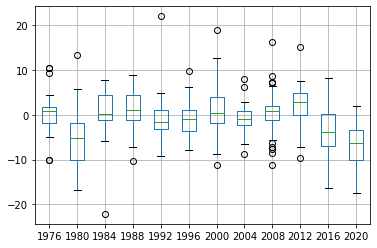

In [418]:
results_for_box.reset_index().boxplot()

In [386]:
results_for_box.head()

cycle,1976,1980,1984,1988,1992,1996,2000,2004,2008,2012,2016,2020
state,,,,,,,,,,,,
Alabama,NaN,2.776541,-0.062461,0.844749,-3.485355,-0.832718,3.174187,-4.181139,0.414170,-3.730444,-6.446857,-6.56606
Alaska,NaN,NaN,NaN,-10.404274,-9.219564,-7.595432,-6.494282,0.203140,-7.288961,NaN,-8.561841,0.00000
Arizona,NaN,-9.804265,NaN,2.729448,-1.217482,-4.401709,6.081240,-1.242700,-4.175309,-0.134159,-0.751255,0.00000
Arkansas,NaN,-5.921054,NaN,-5.934368,-4.632312,-1.199278,-2.865176,-6.049857,-11.186053,2.973904,-6.649858,0.00000
California,2.875825,-3.569431,0.203371,4.556169,-2.307913,-0.748727,8.011504,-0.734520,1.788658,7.474195,8.163313,0.00000


### Dumpbell plot

In [387]:
results_df[["poll_spread", "actual_spread"]]

,poll_spread,actual_spread
0,4.669317,1.793492
1,1.407232,11.417832
2,5.226996,5.147744
3,5.072957,-5.381468
4,-29.529362,-33.876590
...,...,...
548,-29.188440,NaN
549,22.771220,NaN
550,-2.603580,NaN
551,7.662310,NaN


In [396]:
import matplotlib.pyplot as plt

def make_dumbells(results_df, state): 
    state_df = results_df[results_df["state"]==state]
    my_range=range(1,len(state_df.index)+1)
    plt.hlines(y=my_range, xmin=state_df['poll_spread'], xmax=state_df['actual_spread'], color='grey', alpha=0.4)
    plt.scatter(state_df['poll_spread'], my_range, color='navy', alpha=1, label='poll_spread')
    plt.scatter(state_df['actual_spread'], my_range, color='gold', alpha=0.8 , label='actual_spread')
    plt.legend()
    # Add title and axis names
    plt.yticks(my_range, state_df['cycle'])
    ##plt.title("Comparison of the Wages Position and League Position", loc='left')
    ##plt.xlabel('Value of the Positions')
    #plt.ylabel('Season')
    
def make_dumbells2(results_df, state): 
    state_df = results_df[results_df["state"]==state]
    my_range=range(1,len(state_df.index)+1)
    plt.vlines(x=my_range, ymin=state_df['poll_spread'], ymax=state_df['actual_spread'], color='grey', alpha=0.4)
    plt.scatter(my_range, state_df['poll_spread'], color='navy', alpha=1, label='poll_spread')
    plt.scatter(my_range, state_df['actual_spread'], color='gold', alpha=0.8 , label='actual_spread')
    plt.legend()
    # Add title and axis names
    plt.xticks(my_range, state_df['cycle'])
    plt.title(state, loc='left')
    ##plt.xlabel('Value of the Positions')
    #plt.ylabel('Season')
    plt.show()

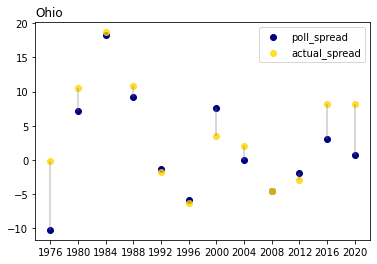

In [397]:
make_dumbells2(results_df, "Ohio")

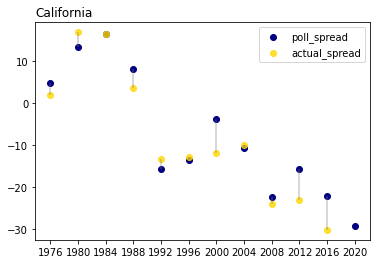

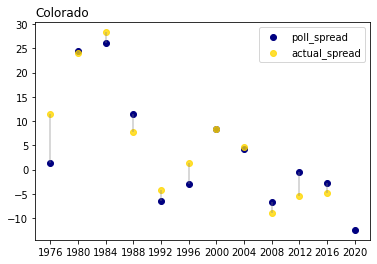

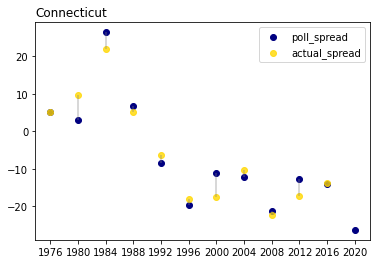

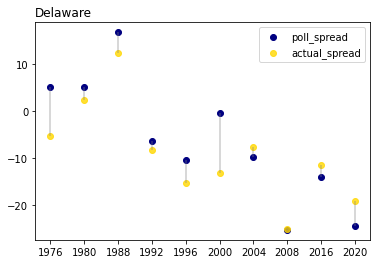

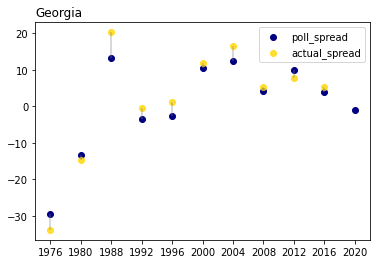

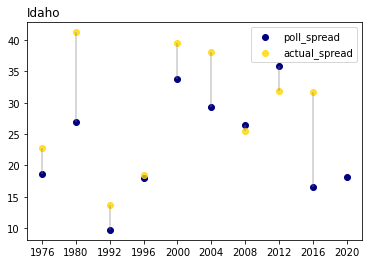

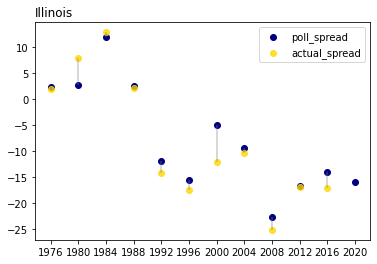

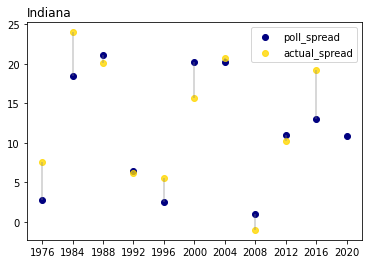

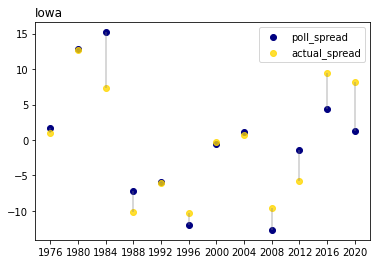

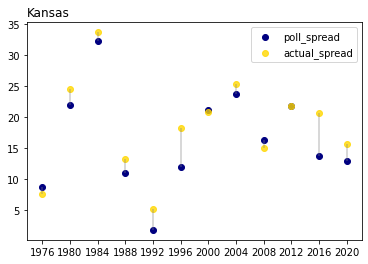

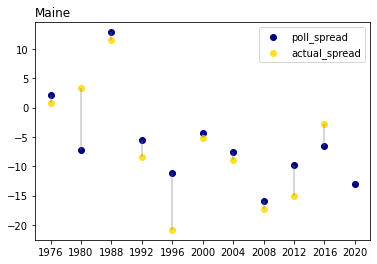

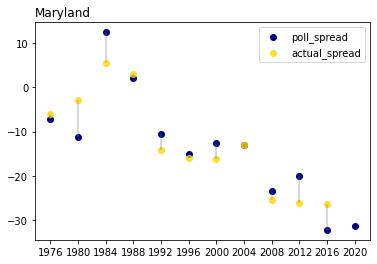

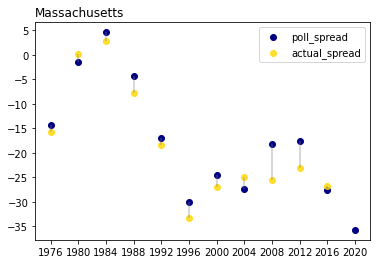

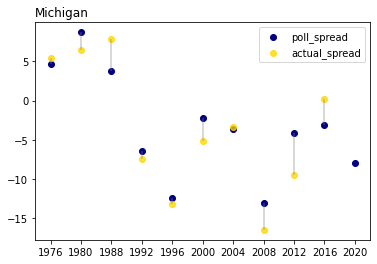

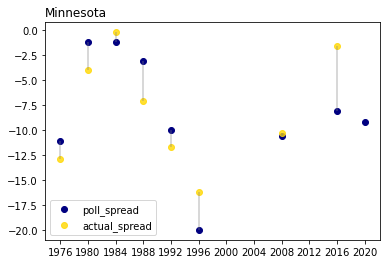

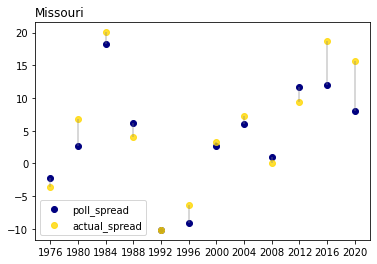

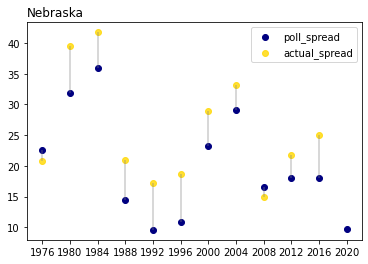

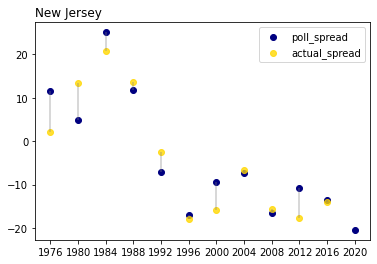

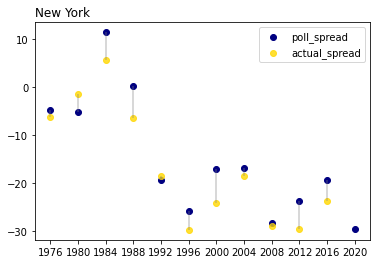

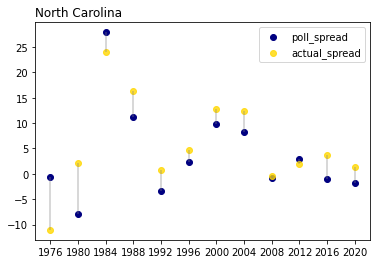

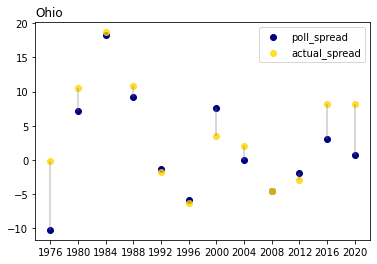

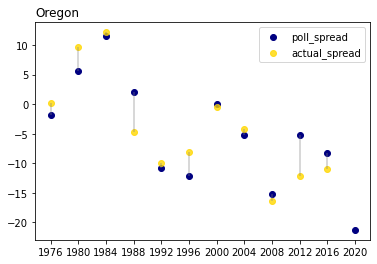

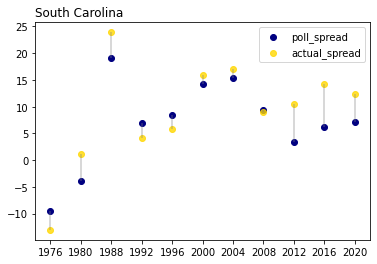

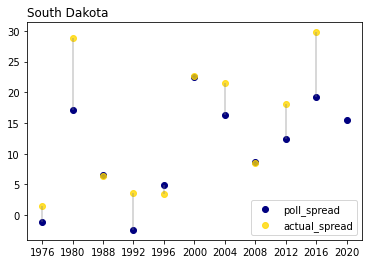

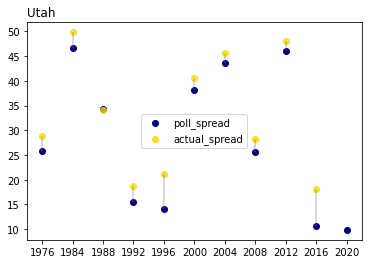

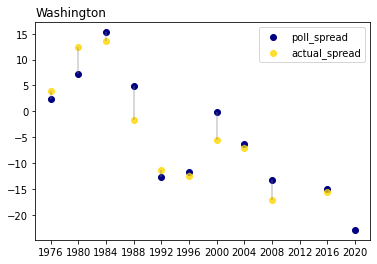

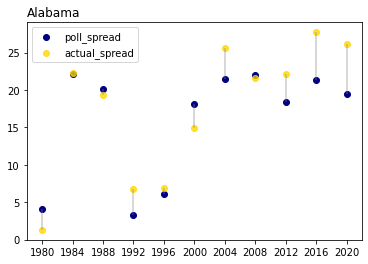

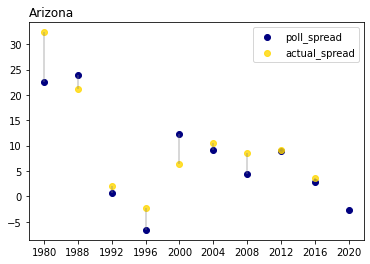

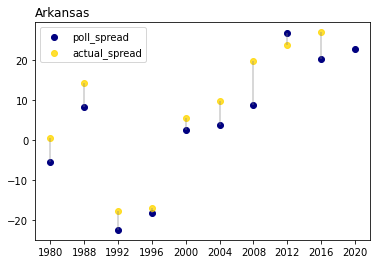

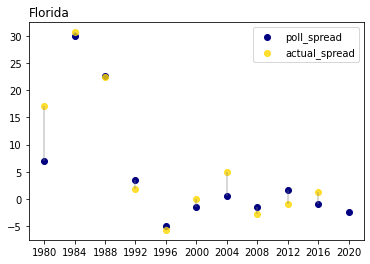

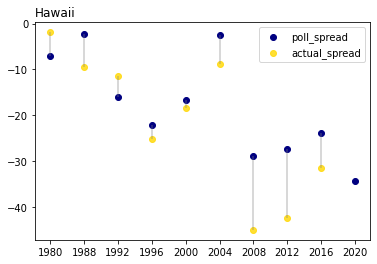

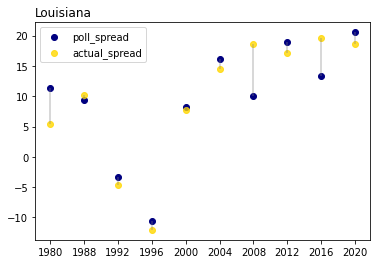

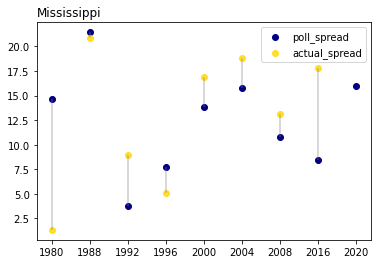

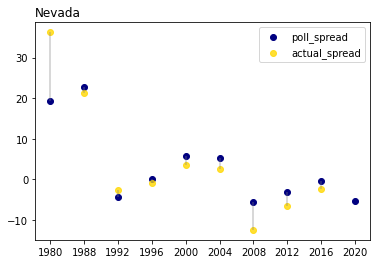

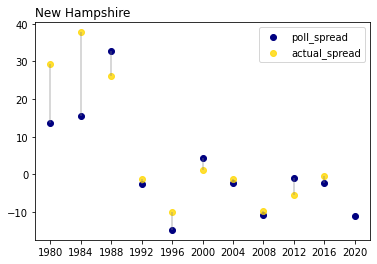

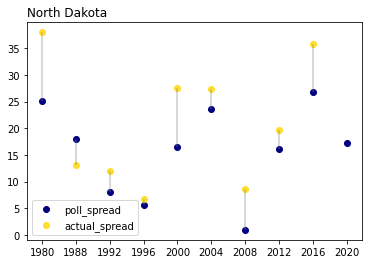

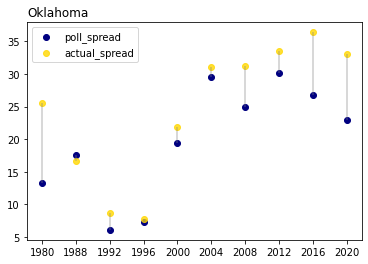

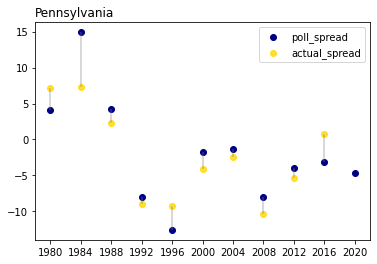

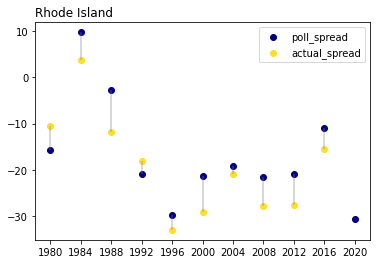

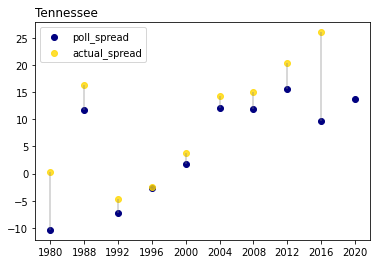

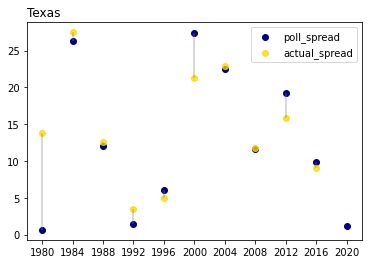

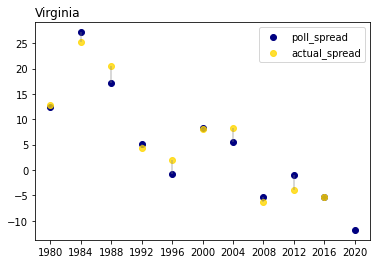

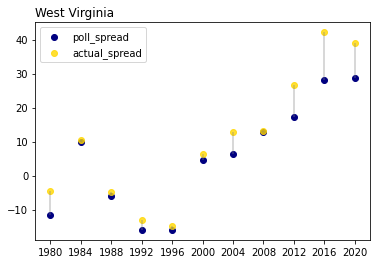

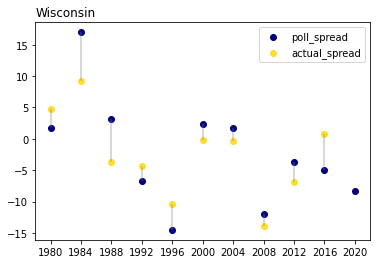

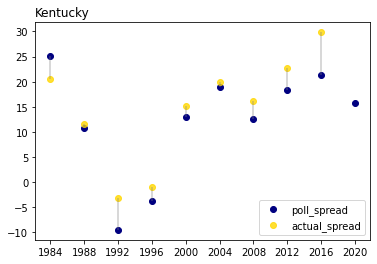

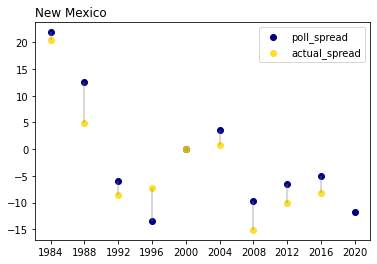

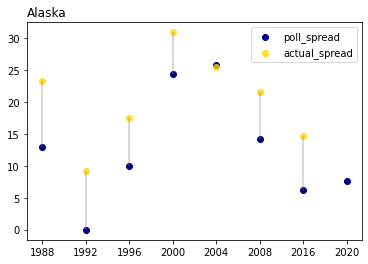

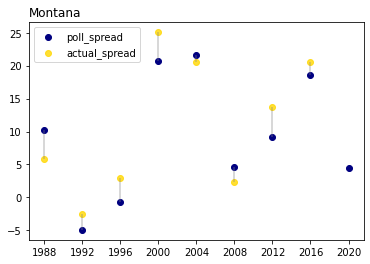

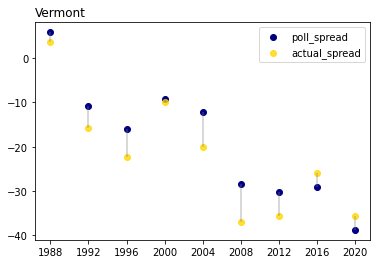

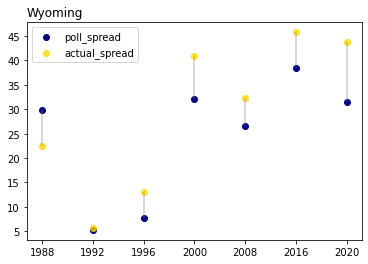

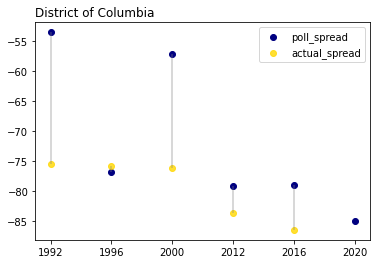

/usr/local/lib/python3.8/site-packages/numpy/core/_asarray.py:83: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


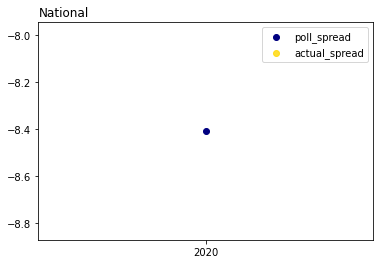

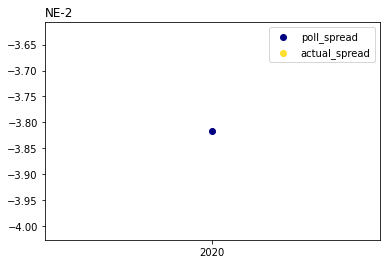

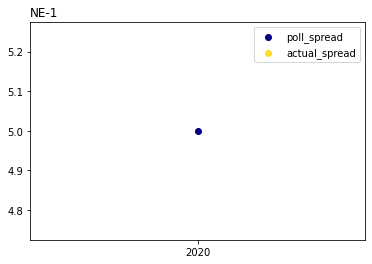

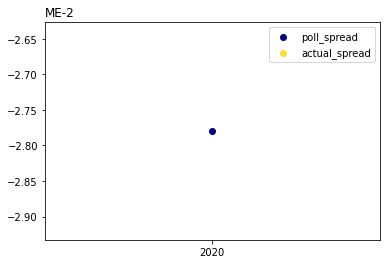

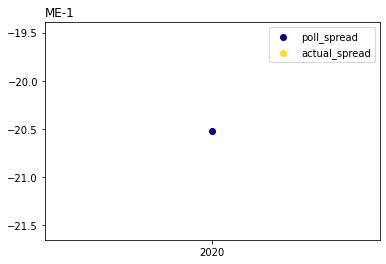

In [398]:
for state in results_df["state"].unique(): 
    make_dumbells2(results_df, state)

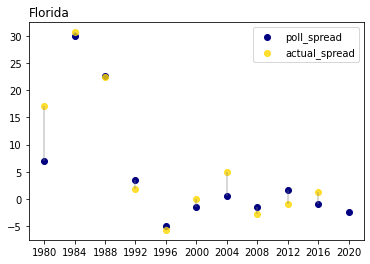

In [399]:
make_dumbells2(results_df, "Florida")

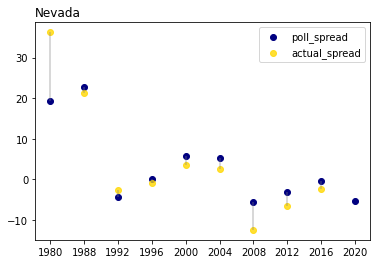

In [400]:
make_dumbells2(results_df, "Nevada")

### Histograms by year

In [401]:
def make_histogram(results_df, cycle): 
    print(cycle)
    results_df[results_df["cycle"]==cycle].hist("poll_minus_actual", range=(-30, 30), density=True)
    plt.show()
    
    worse = results_df[(results_df["cycle"]==cycle) & (results_df["poll_minus_actual"].abs() >= 5.86)]
    print(worse[["state", "poll_minus_actual"]])
    print(worse["state"].shape)


In [402]:
swingers = ["Georgia","Michigan","Nevada","North Carolina","Pennsylvania","Wisconsin","Arizona","Iowa","New Hampshire","Ohio","Texas","Florida"]
results_df[results_df["state"]=="Wyoming"]



,cycle,state,poll_spread,actual_spread,poll_minus_actual
146,1988,Wyoming,29.907066,22.517006,7.390060
197,1992,Wyoming,5.289953,5.596746,-0.306793
248,1996,Wyoming,7.756723,12.976259,-5.219536
299,2000,Wyoming,32.111581,40.924361,-8.812780
398,2008,Wyoming,26.648184,32.204281,-5.556097
496,2016,Wyoming,38.423100,45.769510,-7.346410
497,2020,Wyoming,31.484490,43.700000,-12.215510


1976


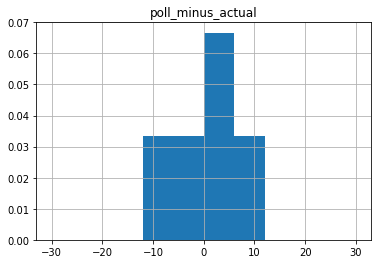

             state  poll_minus_actual
19  North Carolina          10.450499
20            Ohio         -10.016651
(2,)
1980


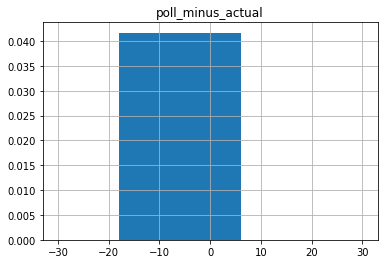

             state  poll_minus_actual
27         Arizona          -9.804265
33         Florida         -10.106428
49          Nevada         -16.880228
50   New Hampshire         -15.749473
53  North Carolina         -10.069049
63           Texas         -13.220401
(6,)
1984


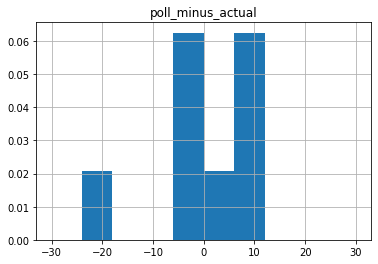

            state  poll_minus_actual
75           Iowa           7.811175
83  New Hampshire         -22.118435
90   Pennsylvania           7.566727
97      Wisconsin           7.813991
(4,)
1988


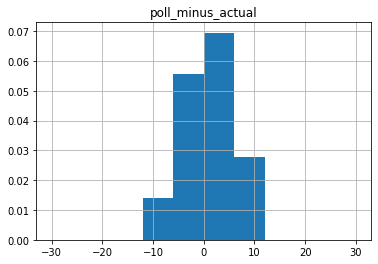

             state  poll_minus_actual
107        Georgia          -7.093902
125  New Hampshire           6.583143
145      Wisconsin           6.723019
(3,)
1992


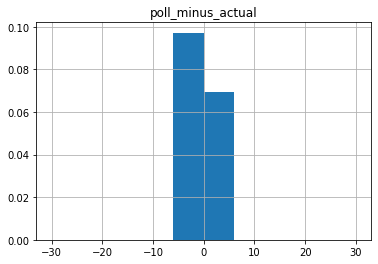

Empty DataFrame
Columns: [state, poll_minus_actual]
Index: []
(0,)
1996


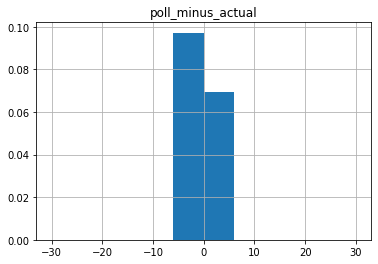

Empty DataFrame
Columns: [state, poll_minus_actual]
Index: []
(0,)
2000


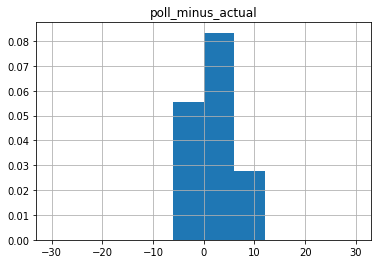

       state  poll_minus_actual
251  Arizona           6.081240
292    Texas           6.123312
(2,)
2004


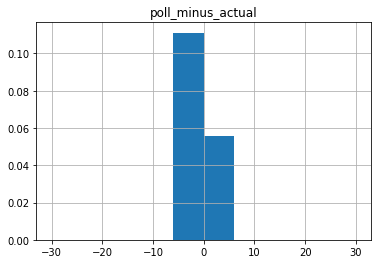

Empty DataFrame
Columns: [state, poll_minus_actual]
Index: []
(0,)
2008


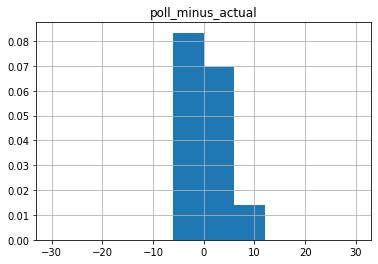

      state  poll_minus_actual
376  Nevada           6.991597
(1,)
2012


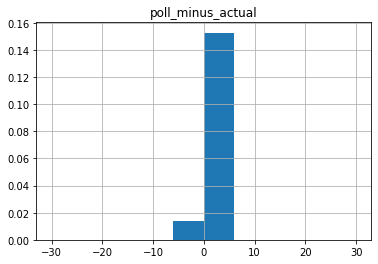

Empty DataFrame
Columns: [state, poll_minus_actual]
Index: []
(0,)
2016


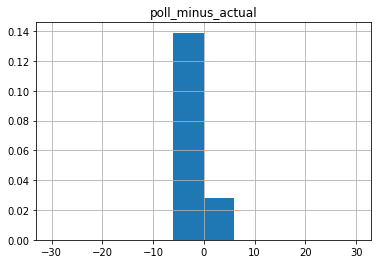

Empty DataFrame
Columns: [state, poll_minus_actual]
Index: []
(0,)
2020


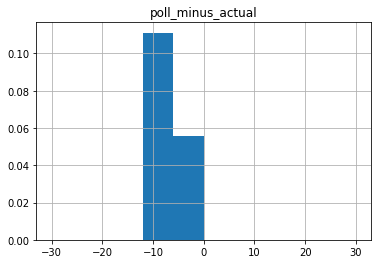

    state  poll_minus_actual
512  Ohio           -7.44486
537  Iowa           -6.91564
(2,)


In [403]:
only_swingers = results_df[results_df["state"].isin(swingers)]

for cycle in results_df["cycle"].unique():
    make_histogram(only_swingers, cycle)